In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def geometric_weight_function( rper , rpar ):
    # this seems the opposite of what I thought...
    return rper**2 / ( rpar**2 + rper**2 )

def rsd_and_geometric_weight_function( rper, rpar, r0, rsd ):
    return 1

def no_weights( rper, rpar ):
    return np.ones( rper.shape )

In [78]:
def bin_correlation_function(rper, rpar, xi, var_xi, bins, custom_weight_func, epsilon=1e-10):
    """
    Calculate the binned correlation function xi(r) as a weighted sum, and its error.

    Returns:
    r_centers : array
        Bin centers.
    xi_r : array
        Weighted xi(r) in each bin.
    xi_err : array
        Error on xi(r) in each bin.
    """

    rper_2d, rpar_2d = np.meshgrid(rper, rpar, indexing='ij')
    r = np.sqrt(rper_2d**2 + rpar_2d**2)
    w = custom_weight_func( rper_2d , rpar_2d ).T #+ 1 / (var_xi + epsilon)

    r_flat = r.flatten()
    xi_flat = xi.flatten()
    w_flat = w.flatten()

    xi_r = []
    xi_var = []
    r_centers = 0.5 * (bins[:-1] + bins[1:])
    for i in range(len(bins) - 1):
        mask = (r_flat >= bins[i]) & (r_flat < bins[i+1])
        if np.any(mask):
            xi_r.append(np.average(xi_flat[mask], weights=w_flat[mask]))
            xi_var.append( 1.0 / np.sum( w_flat[mask] ) )
        else:
            xi_r.append(np.nan)
            xi_var.append(np.nan)

    return r_centers, np.array(xi_r), np.array(xi_var) , custom_weight_func( rper_2d , rpar_2d )


In [79]:
lrg_xi_gn_p_results = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_xi_gn_p_results.npy')
lrg_xi_gn_x_results = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_xi_gn_x_results.npy')

# lrg_rperp = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_rperp.npy')
# lrg_rpar = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_rpar.npy')

lrg_rperp = np.linspace(0, 200, 100)  # Placeholder for rperp
lrg_rpar = np.linspace(-200, 200, 200)  # Placeholder

lrg_xi_var_results = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_var_results.npy')



In [80]:
lrg_xi_var_results.shape

(200, 100)

In [81]:
lrg_xi_gn_p_results.shape

(200, 100)

In [82]:
weighted_r , weighted_xi, weighted_var_xi , weighted_wgrid = bin_correlation_function( lrg_rperp, 
                                   lrg_rpar, 
                                   lrg_xi_gn_p_results, 
                                   lrg_xi_var_results, bins=np.linspace(0, 200, 20), 
                                   custom_weight_func=geometric_weight_function)

r , xi, var_xi , wgrid = bin_correlation_function( lrg_rperp, 
                                   lrg_rpar, 
                                   lrg_xi_gn_p_results, 
                                   lrg_xi_var_results, bins=np.linspace(0, 200, 20), 
                                   custom_weight_func=no_weights)

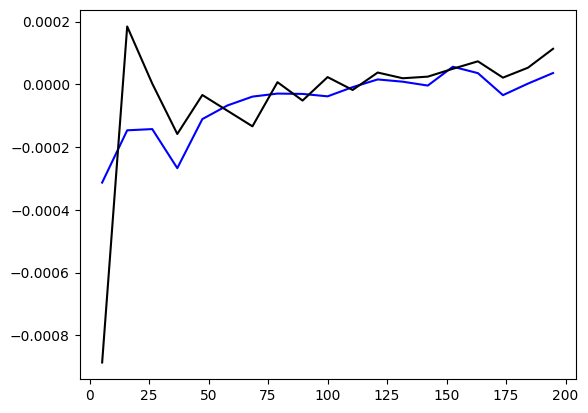

In [86]:
plt.plot( r , weighted_xi , 'b-', label='Geometric Weight Function') 
plt.plot( r , xi , 'k-', label='No Weight Function') 

<ErrorbarContainer object of 3 artists>

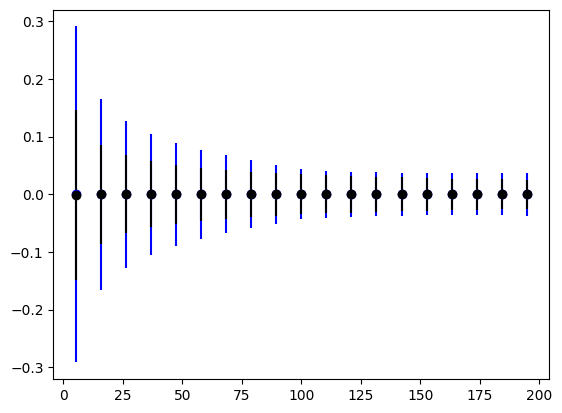

In [83]:
plt.errorbar( r , weighted_xi , yerr = weighted_var_xi**0.5 , fmt ='bo', label='Geometric Weight Function') 
plt.errorbar( r , xi , yerr = var_xi**0.5 , fmt ='ko', label='No Weight Function') 

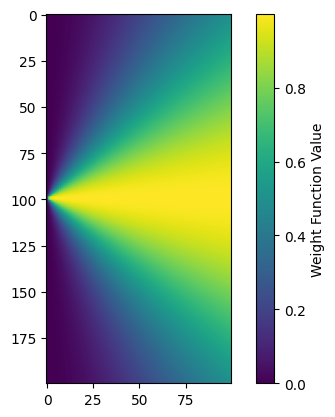

In [61]:
plt.imshow( wgrid.T )
plt.colorbar(label='Weight Function Value')